In [1]:
#---Authors: Thomas Donovan / Kylie Gollmer / Edward Oughton
#---Code Purpose: Gather images to be processed, Clip those images to tif files, and process those tif files
#---Last Update: 5/10/22
#Initialization of all neccessary packages
import geopandas as gpd
from geojson import Point, Feature, FeatureCollection, dump
from shapely.geometry import Point, Polygon
import pandas as pd
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

In [ ]:
#sign into sentinal sat
api = SentinelAPI('--------', '--------')
api

In [2]:
#----------IMAGE GATHERING VIA API-------------#

#------- Image Collection-------#
#-------Make sure the GeoJsons are already cropped close----#

#Grab the GeoJson for all 11 sites. )
#Bridge --- Image Condition
#---Near Kiev Bridges
#Irpin:      Poor
#Ivankiv:    Good
#Vyshgorod:  Poor
#Slavutych:  Good 
#---East Ukraine Bridges
#Baturyn:    Good
#---South Ukraine Bridges
#Kobleve:    Poor 


In [3]:
irpin_geojson = {
  "type": "Feature", 
  "geometry": {
	"type": "Polygon", 
	"coordinates": [ #Geometry coordinates
	  [
		[ 30.22492, 
		  50.50132
		],
		[30.29053,
		  50.50132
		],
		[30.29053,
		 50.48119
		],
		[ 30.22492,
		  50.48119
		],
		[30.22492,
		  50.50132
		],
	  ],
	]
  },
    "properties": {'id': 'Irpin_Bridge'}, 
}
irpin_geojson

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[30.22492, 50.50132],
    [30.29053, 50.50132],
    [30.29053, 50.48119],
    [30.22492, 50.48119],
    [30.22492, 50.50132]]]},
 'properties': {'id': 'Irpin_Bridge'}}

In [4]:
ivankiv_geojson = {
  "type": "Feature", 
  "geometry": {
	"type": "Polygon", 
	"coordinates": [ #Geometry coordinates
	  [
		[ 30.22492, 
		  50.50132
		],
		[30.29053,
		  50.50132
		],
		[30.29053,
		 50.48119
		],
		[ 30.22492,
		  50.48119
		],
		[30.22492,
		  50.50132
		],
	  ],
	]
  },
    "properties": {'id': 'ivankiv_Bridge'}, 
}
ivankiv_geojson

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[30.22492, 50.50132],
    [30.29053, 50.50132],
    [30.29053, 50.48119],
    [30.22492, 50.48119],
    [30.22492, 50.50132]]]},
 'properties': {'id': 'Irpin_Bridge'}}

In [5]:
vyshhorod_geojson = {
  "type": "Feature", 
  "geometry": {
	"type": "Polygon", 
	"coordinates": [ #Geometry coordinates
	  [
		[30.3156,
		 50.3520
		],
		[30.3313,
		 50.3520
		],
		[30.3313,
		  50.34512
		],
		[30.3156,
		  50.34512
		],
		[30.3156,
		 50.3520
		],
	  ],
	]
  },
    "properties": {'id': 'vyshhorod_Bridge'}, 
}
vyshhorod_geojson

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[30.3156, 50.352],
    [30.3313, 50.352],
    [30.3313, 50.34512],
    [30.3156, 50.34512],
    [30.3156, 50.352]]]},
 'properties': {'id': 'vyshhorod_Bridge'}}

In [6]:
slavutych_geojson = {
  "type": "Feature", 
  "geometry": {
	"type": "Polygon", 
	"coordinates": [ #Geometry coordinates
	  [
		[30.3808,
		 51.235758
		],
		[30.392305,
		 51.235758
		],
		[30.392305,
		 51.233055
		],
		[30.3808,
		 51.233055
		],
		[30.3808,
		 51.235758
		],
	  ],
	]
  },
    "properties": {'id': 'slavutych_Bridge'}, 
}
slavutych_geojson

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[30.3808, 51.235758],
    [30.392305, 51.235758],
    [30.392305, 51.233055],
    [30.3808, 51.233055],
    [30.3808, 51.235758]]]},
 'properties': {'id': 'slavutych_Bridge'}}

In [7]:
baturyn_geojson = {
  "type": "Feature", 
  "geometry": {
	"type": "Polygon", 
	"coordinates": [ #Geometry coordinates
	  [
		[32.540691,
		 51.203062
		],
		[32.545142,
		 51.203062
		],
		[32.545142,
		 51.201433
		],
		[32.540691,
		 51.201433
		],
		[32.540691,
		 51.203062
		],
	  ],
	]
  },
    "properties": {'id': 'baturyn_Bridge'}, 
}
baturyn_geojson

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[32.540691, 51.203062],
    [32.545142, 51.203062],
    [32.545142, 51.201433],
    [32.540691, 51.201433],
    [32.540691, 51.203062]]]},
 'properties': {'id': 'baturyn_Bridge'}}

In [8]:
kobleve_geojson = {
  "type": "Feature", 
  "geometry": {
	"type": "Polygon", 
	"coordinates": [ #Geometry coordinates
	  [
		[31.0950,
		 46.3928
		],
		[31.103787,
		 46.3928
		],
		[31.103787,
		 46.390995
		],
		[31.0950,
		 46.390995
		],
		[31.0950,
		 46.3928
		],
	  ],
	]
  },
    "properties": {'id': 'kobleve_Bridge'}, 
}
kobleve_geojson

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[31.095, 46.3928],
    [31.103787, 46.3928],
    [31.103787, 46.390995],
    [31.095, 46.390995],
    [31.095, 46.3928]]]},
 'properties': {'id': 'kobleve_Bridge'}}

In [53]:
#------- Image Series Tuples-------#
#---Collects a table of before and after images to be utelized
#('date1','date2','geojson_coordinates_or_object'),  #Example

#Only running 2 until full program works, then scale
before_image_series = [
    ('20210901','20210922',irpin_geojson),         #Irpin Bridge 
    ('20210901','20210922',ivankiv_geojson),       #Ivankiv Bridge
    ('20210901','20210914',vyshhorod_geojson),     #Vyshhorod Bridge
    ('20210901','20210914',slavutych_geojson),     #Slavutych Bridge
    ('20210901','20210914',baturyn_geojson),       #Baturyn Bridge
    ('20210901','20210914',kobleve_geojson),       #Kobleve Bridge
    
]

after_image_series = [
    ('20220315','20220406',irpin_geojson),         #Irpin Bridge 
    ('20220315','20220406',ivankiv_geojson),       #Ivankiv Bridge
    ('20220301','20220316',vyshhorod_geojson),     #Vyshhorod Bridge
    ('20220301','20220316',slavutych_geojson),     #Slavutych Bridge
    ('20220220','20220314',baturyn_geojson),       #Baturyn Bridge
    ('20220220','20220314',kobleve_geojson),       #Kobleve Bridge
]

In [10]:
#Download the images!
for image in before_image_series:  
    footprint = geojson_to_wkt(image[2])
    before_products = api.query(
    footprint,
    platformname = 'Sentinel-2',
    date = (image[0],image[1]), 
    cloudcoverpercentage = (0,20),
    limit=1 
    )

    api.download_all(before_products)
    

MD5 checksumming:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

LTA retrieval:   0%|          | 0/1 [00:00<?, ?product/s]

MD5 checksumming:   0%|          | 0.00/945M [00:00<?, ?B/s]

LTA retrieval:   0%|          | 0/1 [00:00<?, ?product/s]

MD5 checksumming:   0%|          | 0.00/866M [00:00<?, ?B/s]

In [16]:
for image in after_image_series: 
    footprint = geojson_to_wkt(image[2])
    after_products = api.query(
    footprint,
    platformname = 'Sentinel-2',
    date = (image[0],image[1]), 
    cloudcoverpercentage = (0,50),
    limit=1
    )
    
    api.download_all(after_products)

MD5 checksumming:   0%|          | 0.00/741M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/779M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/918M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/997M [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/839M [00:00<?, ?B/s]

In [23]:
#----Unzip Files into our API Downloads folder
import os
import zipfile

all_filenames_in_folder = os.listdir() 

filenames_to_unzip = []

for filename in all_filenames_in_folder:
    if filename.endswith('.zip'):
        filenames_to_unzip.append(filename)

folder = 'api_downloads'
if not os.path.exists(folder):
    os.mkdir(folder) 
    
for filename in filenames_to_unzip:
    
    # Unzip the zip file and put it in the 'unzipped' folder
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(folder)

In [ ]:
#----Image Clipping----# 

In [12]:
import os
import rasterio
from rasterio.plot import show
from rasterio.features import shapes
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#----
#----#!! BRING YOUR TCI FILES UP TO THE MAIN PROJECT FOLDER, IT JUST MAKES LIFE EASIER

In [43]:
#Create List of Tuples, holding the geographic coordinates, the image file, and bridge name for file creation.


#How to get coordinates: Open .jp2 file in QGIS, locate bridge, grab the epsg(32635) coordinates and enter. 
#This is my best workaround in the face of bug solving that I am not skilled enough to solve and in the face of needing data.

             
                     # (xmin)(ymin)(xmax)(ymax) CRS: espg(32635)
before_series = [ (730951.3,5598074.2,731409.3,5598504.1,'T35UQR_20220505T090549_TCI_10m.jp2','Irpin'),
                  (703328.7,5644458.2,704548.5,5645279.2,'T35UPS_20220505T090549_TCI_10m.jp2','Ivankiv'),
                  (325431.5,5606072.4 ,326686.0,5606977.6,'T36UUB_20210909T085601_TCI_10m.jp2','Vyshhorod'),
                  (334113.4,5695099.3,337703.1,5697657.5,'T36UUB_20210909T085601_TCI_10m.jp2','Slavutych'),
                  (492714.1,5686946.1,494486.3,5688231.4,'T36UVB_20210911T084559_TCI_10m.jp2','Baturyn'),
                  (359395.0,5168012.1,360716.4,5168953.8,'T36TUS_20210909T085601_TCI_10m.jp2','Kobleve'),
                 ]


after_series =  [ (730951.3,5598074.2,731409.3,5598504.1,'T35UQR_20220311T090801_TCI_10m.jp2','Irpin'),
                  (703328.7,5644458.2,704548.5,5645279.2,'T35UPS_20220505T090549_TCI_10m.jp2','Ivankiv'),
                  (325431.5,5606072.4 ,326686.0,5606977.6,'T36UUB_20220311T090801_TCI_10m.jp2','Vyshhorod'), 
                  (334113.4,5695099.3,337703.1,5697657.5,'T36UUB_20220311T090801_TCI_10m.jp2','Slavutych'), 
                  (492714.1,5686946.1  ,494486.3,5688231.4,'T36UVB_20220310T084709_TCI_10m.jp2','Baturyn'),  
                  (359395.0,5168012.1,360716.4,5168953.8,'T36TUS_20220313T085709_TCI_10m.jp2','Kobleve'),  
                 ]
          

#Irpin:      Good
#Ivankiv:    Good
#Vyshhorod:  Poor
#Slavutych:  Good
#Peremohy:
#---East Ukraine Bridges
#Baturyn:    Poor
#---South Ukraine Bridges
#Kobleve:    Poor


In [19]:
#Little bit of code to check the CRS of my jp2 files, since this has been the source of a lot of pain for me.
for image in before_series:   
    my_image = rasterio.open(image[4])
    print(my_image.crs)

EPSG:32635
EPSG:32635
EPSG:32636
EPSG:32636
EPSG:32636
EPSG:32636


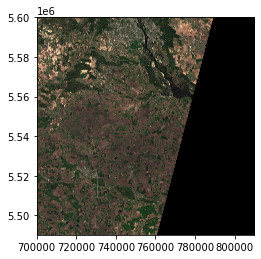

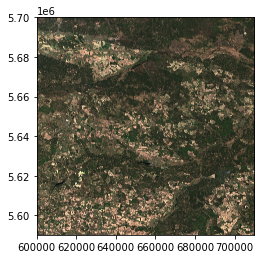

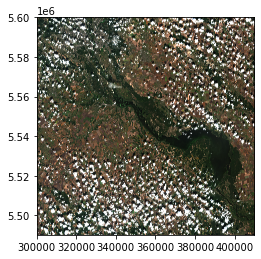

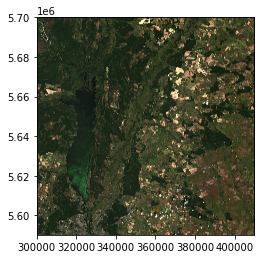

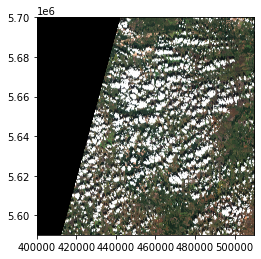

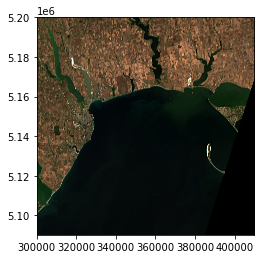

In [16]:
#Image Inspection
for image in before_series:
    my_image = rasterio.open(image[4])
    my_image
    
    from rasterio.plot import show
    show(my_image)

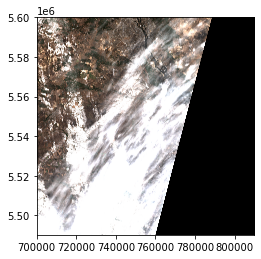

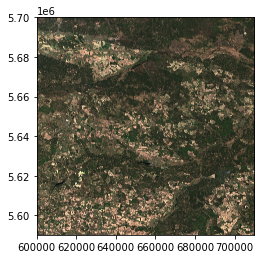

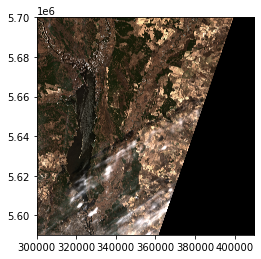

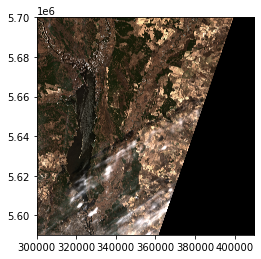

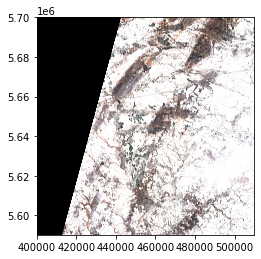

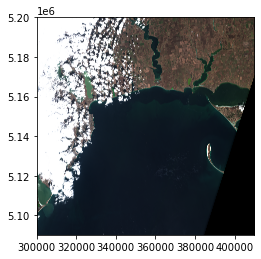

In [68]:
for image in after_series:
    my_image = rasterio.open(image[4])
    my_image
    
    from rasterio.plot import show
    show(my_image)

In [ ]:
# 2 for-loops to process coordinates, clip all jp2 files, copy meta data and create a tif file.

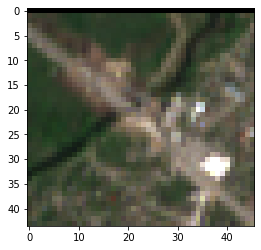

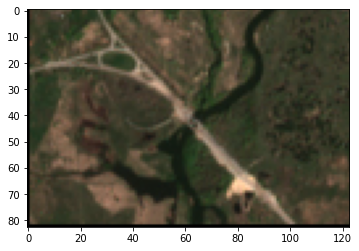

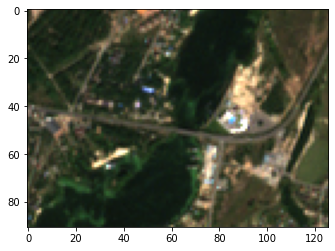

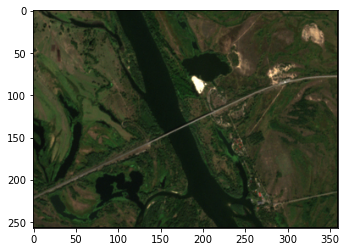

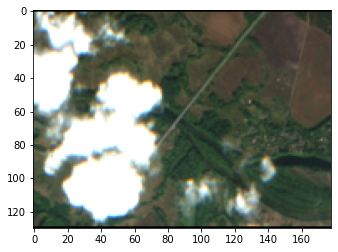

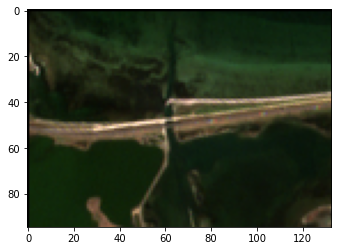

In [44]:
from rasterio.mask import mask
#Loop to clip images
for image in before_series:
    
    #This opens the band from the series
    my_image = rasterio.open(image[4])
    my_image
 
    
    xmin = image[0]
    ymin = image[1]
    xmax = image[2]
    ymax = image[3]
    
    my_geojson = [
        { 
        "type": "Polygon", 
        "coordinates": [ 
          [
            [
              xmin,
              ymin
            ],
            [
              xmax,
              ymin
            ],
            [
              xmax,
              ymax
            ],
            [
              xmin,
              ymax
            ],
            [
              xmin,
              ymin
         ], 
        ],
       ] 
        }  
    ]
    
    with rasterio.open(image[4]) as img:
        clipped, transform = mask(img, my_geojson, crop=True)
   
    #Copy over and Update meta data
    meta = my_image.meta.copy()
    meta.update(
        {

            "transform": transform,
            "height":clipped.shape[1],
            "width":clipped.shape[2]
        }
    )

    #Write to a .tif file
    filename_out = '{}_before_clipped.tif'.format(image[5])
    
    with rasterio.open(filename_out, 'w', **meta) as dst:
        dst.write(clipped)

    show(clipped)

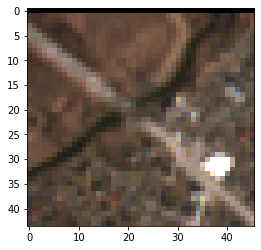

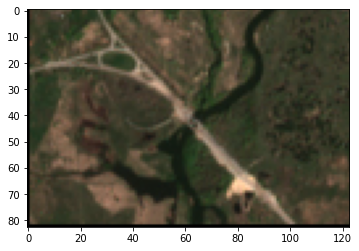

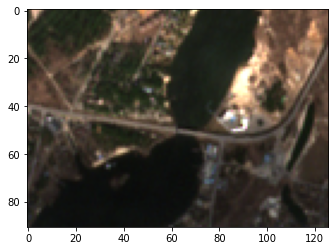

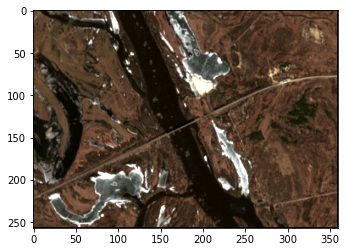

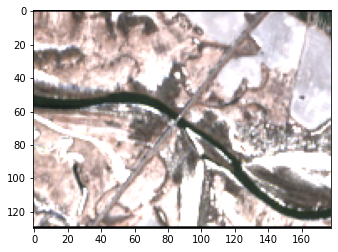

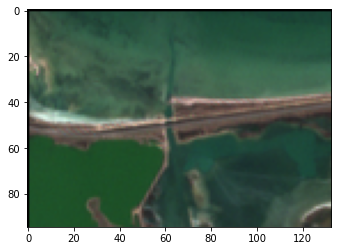

In [40]:
for image in after_series:
    
    my_image = rasterio.open(image[4])
    my_image
 
    
    xmin = image[0]
    ymin = image[1]
    xmax = image[2]
    ymax = image[3]
    
    my_geojson = [
        { 
        "type": "Polygon", 
        "coordinates": [
          [
            [
              xmin,
              ymin
            ],
            [
              xmax,
              ymin
            ],
            [
              xmax,
              ymax
            ],
            [
              xmin,
              ymax
            ],
            [
              xmin,
              ymin
         ], 
        ],
       ] 
        }  
    ]
    
    with rasterio.open(image[4]) as img:
        clipped, transform = mask(img, my_geojson, crop=True)
   
    #Copy Meta Data
    meta = my_image.meta.copy()
    meta.update(
        {

            "transform": transform,
            "height":clipped.shape[1],
            "width":clipped.shape[2]
        }
    )

    #Use bridge name to name tif
    filename_out = '{}_after_clipped.tif'.format(image[5])
    
    with rasterio.open(filename_out, 'w', **meta) as dst:
        dst.write(clipped)

    show(clipped)

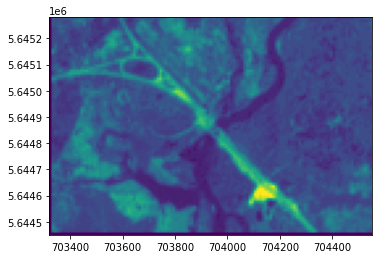

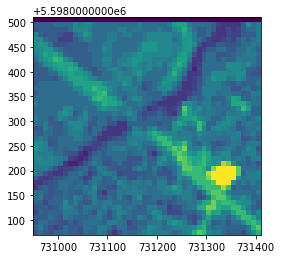

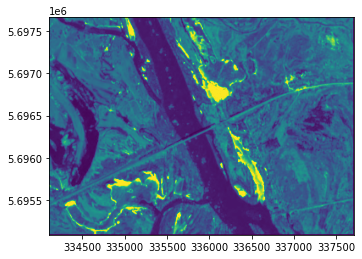

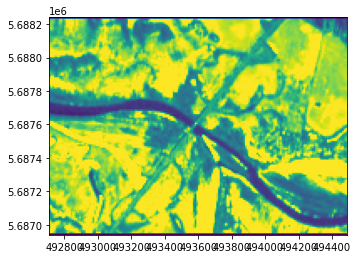

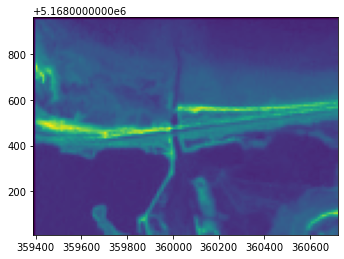

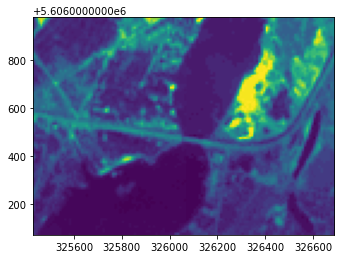

In [56]:
#Alternate presentation of clipped images
collected_images = [('Ivankiv_after_clipped.tif'),
                   ('Irpin_after_clipped.tif'),
                   ('Slavutych_after_clipped.tif'),
                   ('Baturyn_after_clipped.tif'),
                   ('Kobleve_after_clipped.tif'),
                   ('Vyshhorod_after_clipped.tif')]

for image in collected_images:
    my_image1 = rasterio.open(image)
    my_image1
    
    from rasterio.plot import show
    show(my_image1)
    

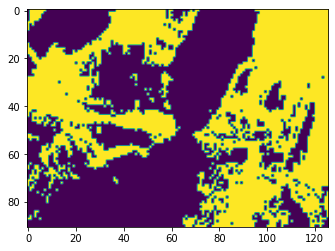

In [66]:
#Water indexing for select images
for image in collected_images:
    my_image = rasterio.open(image)
    
    red = my_image.read(1)
    green = my_image.read(2)
    blue = my_image.read(3)
    
    red = np.float32(red)
    green = np.float32(green)
    blue = np.float32(blue)
    
#Water indexing
    water_index = np.zeros(blue.shape)
    water_index[(red > green)] = 1

    plt.imshow(water_index)